# KNN (k-vecinos más cercanos)

Utilizaremos la base de datos ```load_iris```, que ya viene con ```sklearn```, para clasificar diferentes tipos de flores según sus características.

## Paso 1: Cargar las herramientas y la base de datos

Primero, necesitamos cargar los datos, en este caso, sobre flores, y para eso usamos ```sklearn```. La base de datos load_iris tiene información sobre tres tipos de flores y nos dice cómo son en función de la forma de sus pétalos y sépalos.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargamos los datos
data = load_iris()
X = data.data  # Las características de cada flor
y = data.target  # Las etiquetas (el tipo de flor)

Revisemos el tamaño de nuestro dataset

In [17]:
X.shape # 3 Columnas sin contar la variable objetivo (Gráfico de 4 dimensiones)

(150, 4)

Dado que es imposible observar un gráfico en 4 dimensiones y se dificulta el entendimiento de un gráfico tridimensional, tomaremos las relaciones de a dos variables para observar el comportamiento de nuestro conjunto de datos

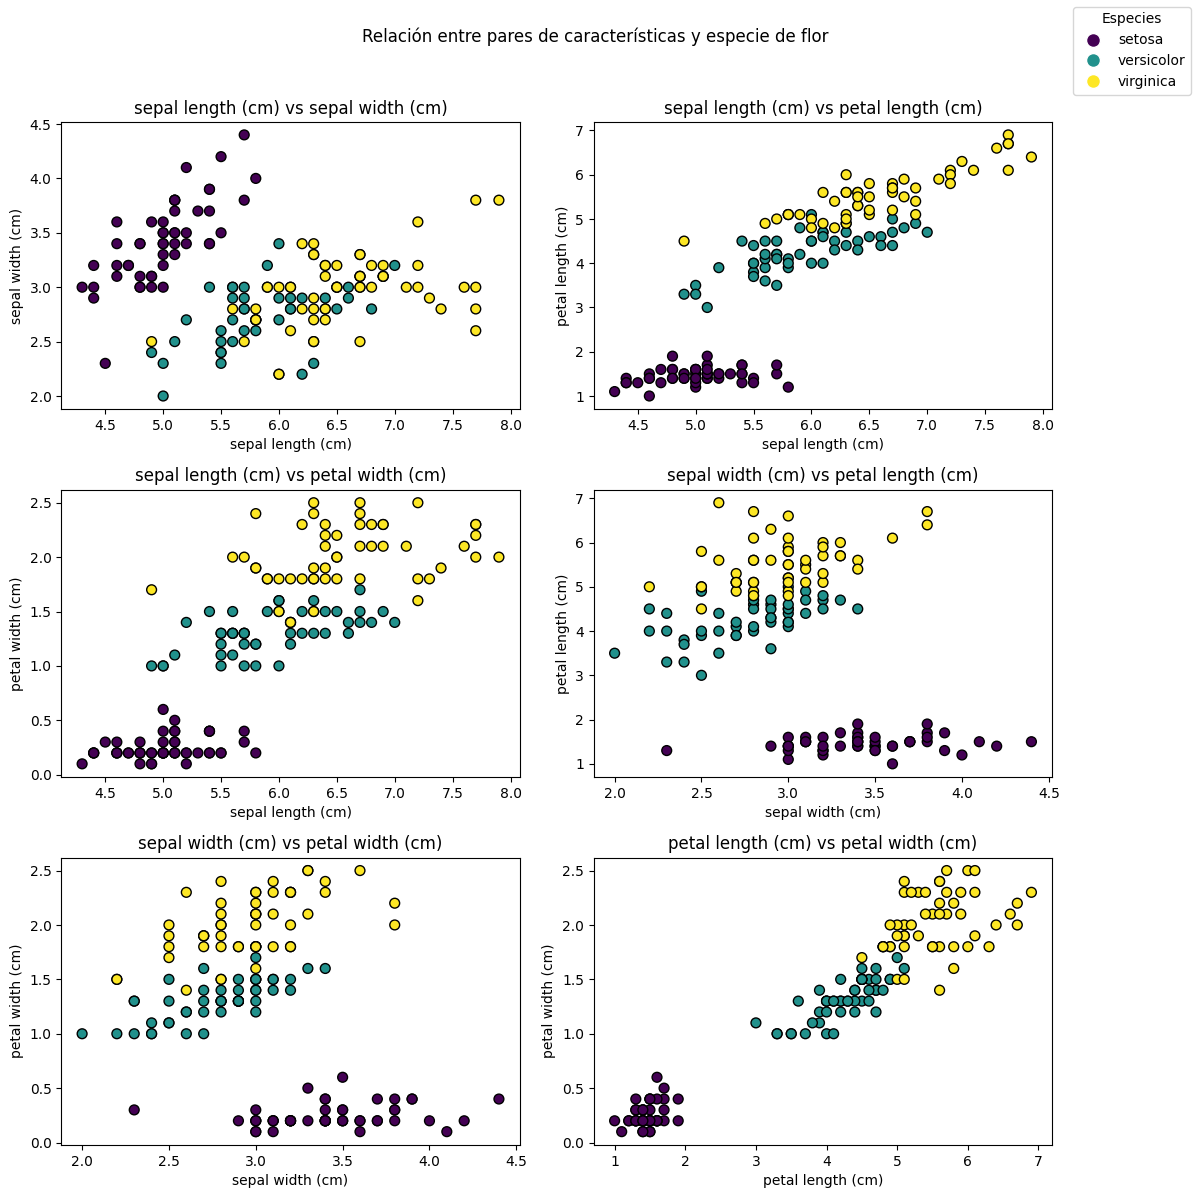

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Definimos los nombres de las características y las especies para facilitar el código
feature_names = data.feature_names
target_names = data.target_names


# Generar combinaciones de las características para obtener todas las posibles pares sin repetir
feature_combinations = list(combinations(feature_names, 2))

# Definir el tamaño de la grilla de acuerdo a la cantidad de combinaciones posibles
num_combinations = len(feature_combinations)
num_rows = (num_combinations + 1) // 2  # Filas necesarias para acomodar las combinaciones en 2 columnas

# Crear la grilla de subplots con dimensiones dinámicas
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.suptitle('Relación entre pares de características y especie de flor')

# Recorrer cada combinación y graficar
for idx, (feature_x, feature_y) in enumerate(feature_combinations):
    row, col = divmod(idx, 2)
    axs[row, col].scatter(df[feature_x], df[feature_y], c=df['target'], cmap='viridis', edgecolor='k', s=50)
    axs[row, col].set_xlabel(feature_x)
    axs[row, col].set_ylabel(feature_y)
    axs[row, col].set_title(f'{feature_x} vs {feature_y}')

# Eliminar los ejes vacíos si la cantidad de subplots no es par
if num_combinations % 2 != 0:
    fig.delaxes(axs[-1, -1])  # Eliminar la última posición vacía

# Añadir leyenda para las especies
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), markersize=10) for i in range(3)]
fig.legend(handles, target_names, title="Especies", loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.show()

Aquí, ```X``` representa las características (cosas como el tamaño y la forma de la flor), y y nos dice qué tipo de flor es (las etiquetas).

## Paso 2: Dividir los datos

Para que el modelo pueda aprender, dividimos los datos en dos partes: una para enseñarle al modelo (con lo que aprenderá a reconocer flores) y otra para probarlo (donde verá si puede adivinar el tipo de flor correctamente).

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Aquí, el ```test_size=0.3``` significa que el 30% de los datos se usará para probar el modelo y el 70% para entrenarlo.

## Paso 3: Crear el modelo KNN

Ahora, vamos a crear el modelo. KNN es un modelo donde, cuando no se sabe la clase de un registro, se le "pregunta" a sus vecinos. Dependiendo de a cuántos vecinos se le pregunte, las respuestas pueden variar.

In [3]:
model = KNeighborsClassifier()

## Paso 4: Selección de los Hiperparámetros

1. **n_neighbors:** Número de Vecinos

Este es el número de vecinos a los que nuestro modelo va a "preguntar" cuando trate de adivinar la flor. Por ejemplo, si ```n_neighbors=3```, el modelo mirará a las tres flores más cercanas y decidirá a qué tipo se parece más nuestra flor desconocida.

In [4]:
model = KNeighborsClassifier(n_neighbors=3)

2. **weights:** Pesos de los Vecinos

A veces, los vecinos más cercanos deberían tener más importancia. ```weights``` controla esto:

* **uniform:** Aquí, todos los vecinos cuentan igual, sin importar si están muy cerca o un poco más lejos.
* **distance:** Aquí, los vecinos más cercanos cuentan más y los que están más lejos cuentan menos. Es como si le preguntaras a los vecinos más cercanos primero, porque están más seguros de la respuesta.

In [5]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')

3. **algorithm:** Algoritmo para Encontrar Vecinos

Este hiperparámetro controla cómo el modelo encuentra a sus vecinos.

* **auto:** El modelo elige el mejor método para encontrar vecinos automáticamente.
* **ball_tree:** Un método que organiza los datos en un "árbol" especial para encontrar rápidamente a los vecinos más cercanos.
* **kd_tree:** Otro tipo de árbol, que organiza los datos para encontrar vecinos de manera eficiente.
* **brute:** Este método es el más simple, compara cada flor con todas las demás. Es lento si tenemos muchos datos, pero efectivo.

In [6]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')

4. **leaf_size:** Tamaño de la Hoja

Si estamos usando ```ball_tree``` o ```kd_tree```, el ```leaf_size``` nos dice cuántas flores puede tener cada "hoja" del árbol. Es como decidir cuántos libros puedes poner en cada estante antes de buscar en el siguiente. Cambiar este número puede hacer que el modelo sea un poco más rápido.

In [7]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', leaf_size=30)

5. **p:** Parámetro de Distancia

Este número nos dice cómo medir la distancia entre los puntos (flores). Piensa en él como diferentes reglas de medición:

* **p=1:** Usa una regla como la distancia en línea recta, también llamada "distancia Manhattan".
* **p=2:** Usa una regla como la distancia entre dos puntos en el espacio, también llamada "distancia Euclidiana".

In [8]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', leaf_size=30, p=2)

## Paso 5: Entrenar el modelo

Ahora le enseñamos al modelo los datos, para que aprenda a reconocer las flores.

In [9]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')

## Paso 6: Probar el modelo

Después de aprender, probamos el modelo con flores que no ha visto antes (X_test) para ver si adivina correctamente el tipo.

In [10]:
y_pred = model.predict(X_test)

## Paso 7: Evaluar el rendimiento
Finalmente, medimos qué tan bien hizo el modelo su trabajo. Para esto, calculamos su precisión (accuracy).

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy:.2f}")

La precisión del modelo es: 1.00


## Paso 8: Visualización

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predecir las clases de cada punto en la cuadrícula
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.RdYlBu, edgecolor='k')

# Añadir etiquetas y título
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Clasificación de flores Iris con K-Vecinos Más Cercanos')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Tipo de Flor')
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

## Resumen de los hiperparámetros

* **n_neighbors:** ¿Cuántos vecinos preguntamos?
* **weights:** ¿Cómo contamos las respuestas de los vecinos (todos iguales o algunos más importantes)?
* **algorithm:** ¿Cómo encontramos a nuestros vecinos más cercanos?
* **leaf_size:** Tamaño de cada grupo cuando usamos un árbol.
* **p:** La regla de medición para la distancia entre puntos.